As a discrete data $\{x_i\}_{i=1}^{I}$  where $x_i\in\{1,2,...6\}$  
$Pr(x=k|\lambda _1.._k) = \prod_{k=1}^{K}{\lambda_k^{x_k}} = \lambda_k$  

Similar with ML, we choose prior **Dirichlet distribute** (conjugate function)  
$\frac{\Gamma[\sum_{k=1}^{N}\alpha_k]}{\prod_{k=1}^{N}{\Gamma[\alpha_k]}}\prod_{k=1}^{N}\lambda_k^{\alpha_k-1}$  
$Pr(\lambda_1..\lambda_6|x_1..x_n) = Pr(x_1..x_n|\theta)Pr(\theta)$,  *it has removed evident*  
$Pr(\lambda_1..\lambda_6|x_1..x_n) = \prod_{i=1}^{N}Cat_{x_i}(\lambda_{1..6})Dir_{\lambda_{1..6}}(\alpha_{1..6})$  
$Pr(\lambda_1..\lambda_6|x_1..x_n) = \frac{\Gamma[\sum_{k=1}^{N}\alpha_k]}{\prod_{k=1}^{N}{\Gamma[\alpha_k]}}\prod_{k=1}^{N}\lambda_k^{\alpha_k+N_k-1}$  

Maximize the log probability and use the Lagrange, we have:  
$\hat{\lambda} = \underset{\lambda_1.._6}{argmax}\left [\log{\frac{\Gamma[\sum_{k=1}^{N}\alpha_k]}{\prod_{k=1}^{N}{\Gamma[\alpha_k]}}}+\sum_{k=1}^{N}(\alpha_k+N_k-1)\log{\lambda_k} + \nu\left(\sum_{k=1}^{N}\lambda_k-1\right)\right]$  
$\hat{\lambda} = \frac{N_k+\alpha_k-1}{\sum_{k=1}^{6}(N_k+a_k-1)}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

In [12]:
I = 10000 # change to recognize result

# alphaPrior = np.ones(6) # it a special type of ML
alphaPrior = [10, 100, 1000, 1000, 10, 1]

original_probabilities = [0.25,0.15,0.1,0.1,0.15,0.25]
data = np.random.choice(np.arange(7)[1:], I, p=original_probabilities)

# Histogram of categorical distribution
x = np.histogram(data, bins=[1, 2, 3, 4, 5, 6, 7])
print(alphaPrior)
print(x[0])
print(x[1][:-1])

[10, 100, 1000, 1000, 10, 1]
[2549 1476 1021  998 1505 2451]
[1 2 3 4 5 6]


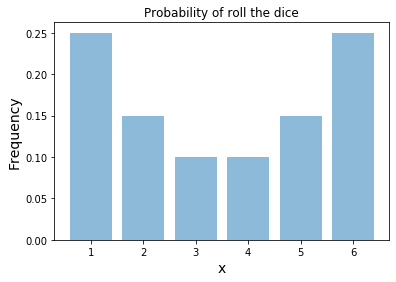

In [13]:
# plt.style.use('ggplot')
# plt.hist(data, bins=6, color = 'b')
plt.bar(np.array(x[1][:-1]), np.array(original_probabilities), align='center', alpha=0.5)
plt.xlabel('x', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Probability of roll the dice')

plt.show()

In [14]:
def MapCategoricalNorm(N, k, alpha):
    sumLow = 0
    for idx in range(k):
        sumLow += N[idx] + alpha[idx] - 1
    lambda_ = (N + alpha - 1)/sumLow
    return lambda_

In [15]:
lambdaList = MapCategoricalNorm(x[0], 6, alphaPrior)

print('Maximum likelihood:', lambdaList)
print('Original:', original_probabilities)

Maximum likelihood: [0.21114321 0.13000413 0.16673545 0.16483698 0.12496905 0.20231118]
Original: [0.25, 0.15, 0.1, 0.1, 0.15, 0.25]


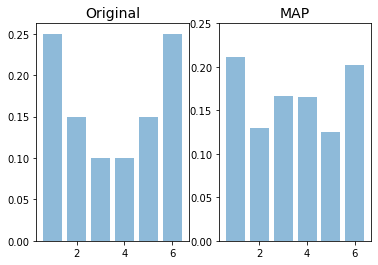

In [23]:
fig, axs = plt.subplots(1, 2)
axs[0].bar(np.array(x[1][:-1]), np.array(original_probabilities), align='center', alpha=0.5)
axs[0].set_title('Original', size = 14)
rang = np.arange(0, 0.3, 0.05)
axs[0].set_yticks(rang)

axs[1].bar(np.array(x[1][:-1]), np.array(lambdaList), align='center', alpha=0.5)
axs[1].set_title('MAP', size = 14)
axs[1].set_yticks(rang)

plt.show()